#  Programming for Data Analysis Project


### Problem Statement 

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.<br><br>
Specifically, in this project you should:<br><br>
    • Choose a real-world phenomenon that can be measured and for which you could
    collect at least one-hundred data points across at least four different variables.<br>
    • Investigate the types of variables involved, their likely distributions, and their
    relationships with each other.<br>
    • Synthesise/simulate a data set as closely matching their properties as possible.<br>
    • Detail your research and implement the simulation in a Jupyter notebook – the
    data set itself can simply be displayed in an output cell within the notebook.<br>

### Attendances at an Emergency Department over a period of 24 hours

The real world phenomenon that I have chosen for this project is 24 hours in an Emergency Department. I am going to base this off a real live Emergency Deparment dataset.I work in the Health Service Executive and I have access and am familiar with this data. I have a sample dataset which I am going to import into my project and discuss the different variables and distributions of each. I am then going to simulate my own dataset based on the variable types and possible distributions.

The dataset that I will base my simulated dataset off is calld EDAttendances24Hour.csv and is within this project.


The variables that I am going to use are listed below. There are 6 variables in total. - <br><br>

• Date of Attendance - Date the patient registers with the Emergency Department<br>
• Age of Patient - The Age of the patient when they attend the Emergency Department - Non-Zero integer<br>
• Hours in ED - The number of hours the patient was in the department - Non-Negative Real number with 2 decimal places<br>
• Triage Category - Triage category will be values 1 - 5. 1 being the most serious patient -  Non-Zero integer<br>
• Sex - Categorical Variable - 2 possible values - Male and Female<br>
• Discharge Distination - This variable is where the patient was discharged to - Categorical Variable - Did Not Wait, Discharged Home, Admitted to Ward, Death (in ED) <br><br>
    
I am going to go through each variable and describe the type of variable, the distribution of the variable and the relationship that variable has with other variables in the dataset. <br><br>


### Types of Variables and Scales of Measurement

Before I go into detail about the varible types in my project I need to explain the data types that can be assigned and why you would assign a particular data type to a variable.

There are two types of data 

1. Qualitative - Refers to information about qualities, or information that cannot be measured.<br>
2. Quantitative - is numerical. It’s used to define information that can be counted.<br><br>
    
Straight away we can put our variables into two very simple groups. The two groups above can be further broken down however and when modelling and understanding our data we need to understand the data types within the dataset.<br><br>


Quantitative, or numerical, data can be broken down into two types: discrete and continuous.<br><br>

1. Discrete - Discrete data is a whole number that can’t be divided or broken into individual parts, fractions or decimals.<br>
2. Continuous - Continuous data describes values that can be broken down into different parts, units, fractions and decimals

### Qualitative or Categorical Data 

This type of data is non-numerical. It can be used to describe the information in a dataset or the description of a variable. 

### Scales of Measurement

There are 4 different scales of measurment also. See 

- Nominal
- Ordinal 
- Ratio
- Interval 

See graphic below for explanation of each of the scale of measurement. 

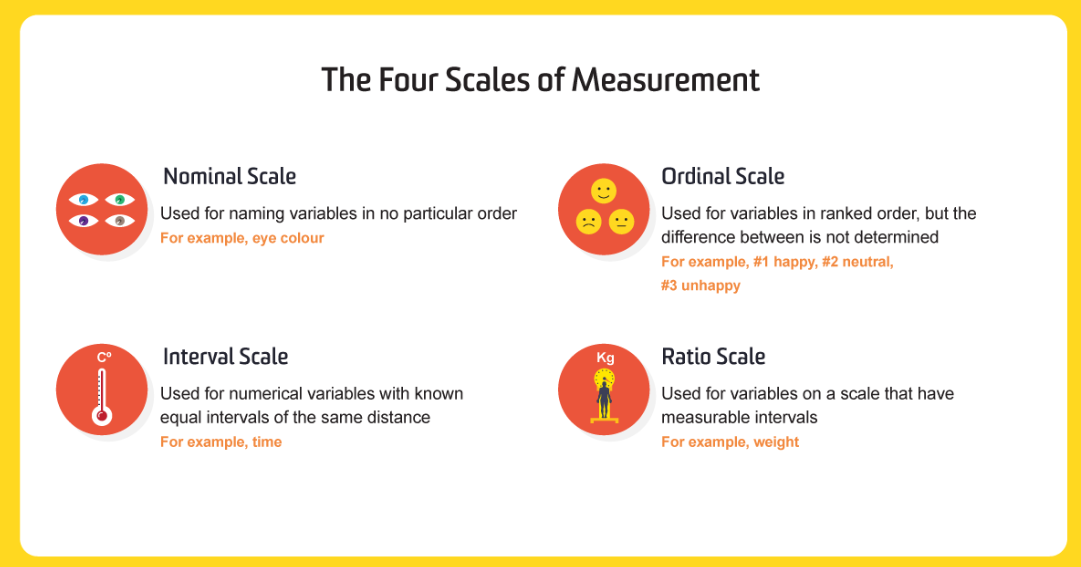





In [ ]:
# Python Datatypes for ED Dataset

# Firstly we are going to look at the layout and data types of the variables in the ED Dataset

#Author: Audrey Allen

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

# Read in CSV file

EDAttendances24Hour  = pd.read_csv('EDAttendances24Hour.csv')

# The code below outputs all of the variables and the variable type
# As you can see from the code below Pandas call the strings 'object' 
# and the numberic fields 'float64'

EDAttendances24Hour.info() 
        
# Below is an output of the Pandas info command. Three are 7 variables on the ED dataset. 

# 3 int64 type variables and 4 objects

# The Registration should be a datetime variable and it is declared as an object by Pandas.
# This is the date/time that a patient enters the Emergency Department

# In order to plot this datetime variable I need to convert this variable from an object to a datetime in Pandas


### Registration

The Date of Attendance is the date the patient registers with the Emergency Department. The field should be in datetime format. Intially when the data is imported it is imported as an object. I have converted this field into a datetime field now and called the new field RegDateTime. Once the date is converted into a datetime object this dataframe is now known as a timeseries.

### Variable Type of RegDateTime

RegDateTime is a quantitative, continuous interval variable. This basically means that this variable can be measured, can be broken down further (Not a whole number) and have know differences between the variables. (such as time difference, minutes, hours etc.)


### Distribution of this RegDateTime

I am going to look at what the distribution of this datetime field looks like.  

I will create a histogram of the new datetime variable (RegDateTime). 

In [ ]:
# I need to convert the REGISTRATION variable into a datetime data type as Pandas is not recognizing
# REGISTRATION as a datetime variable.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('EDAttendances24Hour.csv')

df['REGISTRATION']

# convert to datetime using pd.to_datetime
pd.to_datetime(df['REGISTRATION'])

# I now need to add in a new REGISTRATION field in the datetime format into my dataset

df['RegDateTime'] = pd.to_datetime(df['REGISTRATION'])

df


# Create a histogram to see the distribution of the datetime variable

plt.figure(figsize = (10, 5))
plt.hist(df.RegDateTime,15, histtype='bar', stacked=True)
plt.legend(['ED Attendances by Time'])
plt.title("Datetime Attended ED")
plt.xlabel("Datetime")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Time Attended ED", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Time_Attended_ED.png')# Save to PNG file in the Images folder
plt.show()

df



### Type of Distribution - RegDateTime (REGISTRATION)

The type of distribution for the datetime variable RegDateTime looks to be a 'Normal Distribution' as it fits the bell curve model.  

The highest point on the curve, or the top of the bell, represents the most probable event in a series of data (its mean, mode, and median in this case), while all other possible occurrences are symmetrically distributed around the mean, creating a downward-sloping curve on each side of the peak. The width of the bell curve is described by its standard deviation.

I want to randomly generate a datetime series of data that fits a similar distribution as the ACTUAL ED attendances. 

In [ ]:
# Randomly generate a timeseries for a period of 72 hours by Hour 
# Using the poisson distribution
# A Poisson distribution is a discrete probability distribution. (Discrete counts of number of effects within a given time) 
# It gives the probability of an event happening a certain number of times (k) within a given interval of time or space such 
# as ED attendances within an hour 

import numpy as np
import pandas as pd

rng = np.random.default_rng()

idx = pd.date_range("2023-02-02", periods=72, freq="H")

idx

ts = pd.DataFrame(data=rng.random(len(idx)), index=idx, columns=['Attendances'])

ts

# Use the numpy.random.poisson distrubtion to simulate a time series for say 24 hours or 1 day worth of data

# Synthesising a time series dataset

poisson = pd.DataFrame(data=rng.poisson(5,len(idx)), index=idx, columns=['Attendances'])

poisson


plt.figure(figsize = (10, 5))
plt.hist(poisson,8, histtype='bar', stacked=True)
plt.legend(['Simulated ED Attendances by Hour'])
plt.title("Simulated ED Attendances by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Simulated ED Attendances by Hour", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Simulated ED Attendances by Hour.png')# Save to PNG file in the Images folder
plt.show()


print(poisson)

print(poisson)

2023-02-05 23:59:00
2023-02-02 00:00:00
23-02-02 23:55:41
23-02-05 19:37:04
23-02-05 13:03:41
23-02-02 15:59:59
23-02-02 15:18:06
23-02-02 21:30:36
23-02-02 05:03:34
23-02-03 10:02:58
23-02-03 11:09:40
23-02-03 17:32:13
23-02-04 22:20:18
23-02-02 07:47:31
23-02-03 22:18:55
23-02-05 05:19:11
23-02-04 09:46:15
23-02-02 17:06:24
23-02-04 23:01:48
23-02-02 17:06:21
23-02-05 23:02:30
23-02-03 21:23:29
23-02-05 12:19:50
23-02-04 00:55:13
23-02-05 21:17:17
23-02-04 00:27:39
23-02-02 17:52:37
23-02-02 09:38:12
23-02-02 21:55:22
23-02-04 05:20:02
23-02-05 23:15:04
23-02-05 05:36:19
23-02-04 16:24:37
23-02-03 06:26:22
23-02-02 15:32:25
23-02-04 14:20:31
23-02-03 11:03:06
23-02-05 22:57:26
23-02-02 09:16:52
23-02-02 00:56:16
23-02-05 09:50:28
23-02-02 15:11:11
23-02-05 23:35:50
23-02-03 20:04:59
23-02-04 08:45:42
23-02-03 19:54:05
23-02-04 06:56:43
23-02-02 13:50:23
23-02-04 12:56:50
23-02-04 10:46:18
23-02-03 22:08:30
23-02-05 07:40:50
23-02-04 20:05:57
23-02-05 20:37:15
23-02-05 14:36:04
23-02-

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

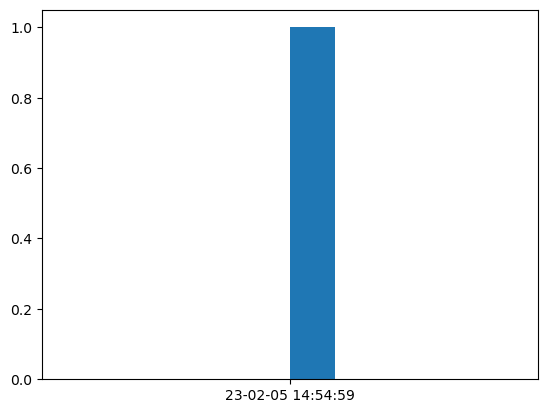

In [627]:
from datetime import datetime
import numpy as np
import pandas as pd



# convert to datetime using pd.to_datetime

# given datetime
current_date = pd.to_datetime('02/05/2023 23:59')
x_date_time = pd.to_datetime('02/02/2023 00:00')

print (current_date)
       
print(x_date_time)

# Difference between two dates
# Get timedelta
timedelta = current_date - x_date_time




for i in range(72):
    random_date = x_date_time + (current_date - x_date_time) * np.random.random() 
    random_date1 = random_date.strftime("%y-%m-%d %H:%M:%S")      
    print(random_date1)


print(random_date1)

plt.hist(random_date1)






### Age of Patient 

The age of the patient is a variable that tells us what age the patient was at the time of the attendance to the Emergency Department. Age is an non-zero integer data type. This means that noone will ever have an age of 0. For this purpose the age will be given in years only so no decimal places.

Age as it is a whole number with no decimal places it is a discrete variable.

Pandas declares the variable age as an int64.

In order to simulate this variable within a dataset I need to see what the distribution is through the 24 period.

The best visual tool for this variable would be a histogram.


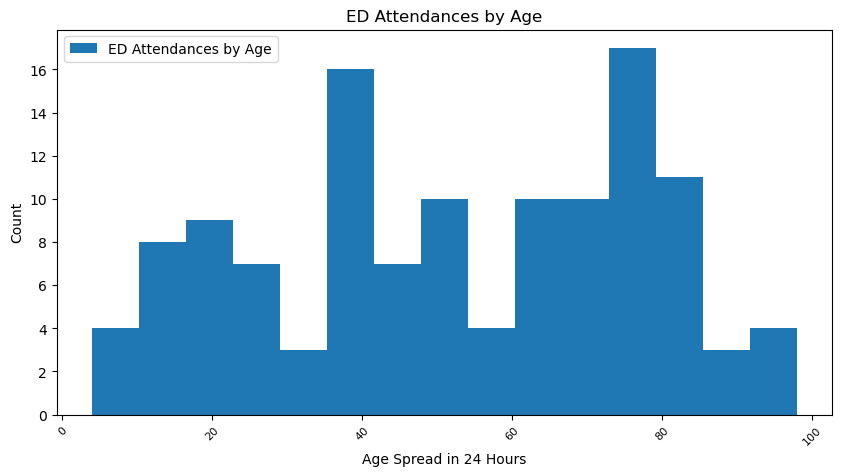

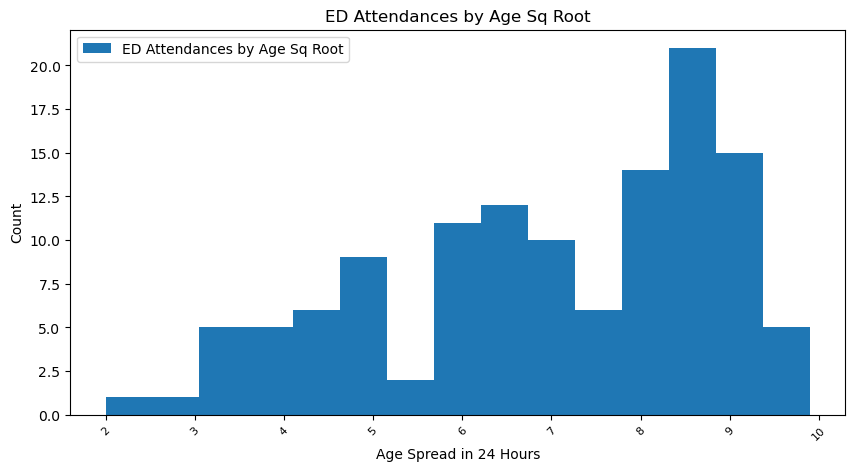

              Age  Hours_in_Deparment  TRIAGE_CATEGORY
count  123.000000          123.000000       123.000000
mean    52.487805            7.804878         3.097561
std     24.763923            5.372453         0.694411
min      4.000000            0.000000         2.000000
25%     35.500000            4.000000         3.000000
50%     52.000000            6.000000         3.000000
75%     76.000000           12.000000         4.000000
max     98.000000           27.000000         5.000000
[ 11.32247721  56.00296409  41.0757408   65.34863552  70.02307978
  39.33942404  81.33383027  37.50496786  14.9089394   75.94261539
  27.26866311  75.69242963  58.52325148  77.52035774  64.64047334
  47.68996822  47.99380808  73.19985557  81.93774919  33.16902794
  49.8851699   46.3021459   66.62011891  76.81345381  54.81802518
 104.74865424  75.86163906  50.9329937   64.39911746  30.193364
  45.58487222  49.91101833  67.6209185   22.76186311  59.37549335
  78.66381497  19.24920493 -12.03011607  22.5

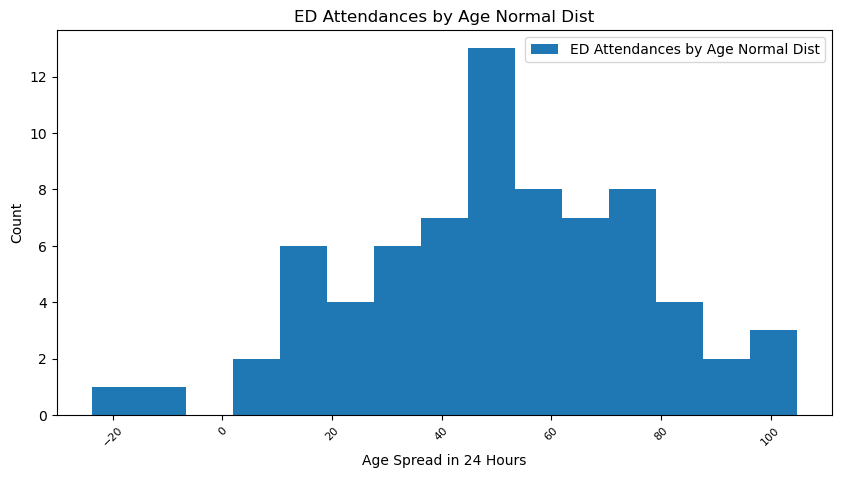

In [628]:
#Histogram of Age variable


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('EDAttendances24Hour.csv')


df

# Create a histogram to see the distribution of the datetime variable

plt.figure(figsize = (10, 5))
plt.hist(df.Age,15, histtype='bar', stacked=True)
plt.legend(['ED Attendances by Age'])
plt.title("ED Attendances by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Age Spread in 24 Hours", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/ED Attendances by Age.png')# Save to PNG file in the Images folder
plt.show()


# I can see that the distribution of age is not normal. 

summary = df.describe()


import math

# Return the square root of different numbers - Age Variable 

# This also does not return a normal distribution 


SquareRoot = np.sqrt(df.Age)

plt.figure(figsize = (10, 5))
plt.hist(SquareRoot,15, histtype='bar', stacked=True)
plt.legend(['ED Attendances by Age Sq Root'])
plt.title("ED Attendances by Age Sq Root")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Age Spread in 24 Hours", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/ED Attendances by Age Sq Root.png')# Save to PNG file in the Images folder
plt.show()


print (summary)
#np.random. normal(loc = 0.0, scale = 1.0, size = None) 

normaldist = np.random. normal(52, 24,72)

print(normaldist)


plt.figure(figsize = (10, 5))
plt.hist(normaldist,15, histtype='bar', stacked=True)
plt.legend(['ED Attendances by Age Normal Dist'])
plt.title("ED Attendances by Age Normal Dist")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Age Spread in 24 Hours", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/ED Attendances by Age Normal Dist.png')# Save to PNG file in the Images folder
plt.show()


### References

https://studyonline.unsw.edu.au/blog/types-of-data#:~:text=Psychologist%20Stanley%20Stevens%20developed%20the,to%20properly%20analyse%20the%20data